In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Group Name : Data Alphas      22 April 2024

Group members :

                Thomas Mpherwane
                Tsidi Tsotetsi
                Tshiamo Khaphola
                Nompilo Hadebe
                Kleinbooi Mathaila
                Zamokuhle Ngcobo

In [40]:
#Import necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt

Initially the money.csv file is imported using the read_csv()

In [41]:
#Import the Dataset as a dataframe


money_df = pd.read_csv("drive/MyDrive/Money.csv", delimiter= ',')

money_df

,MERCHANT_CATEGORIZED_AT,MONTHS,MINUTES,HOURS,YEAR,MERCHANT_NAME,MERCHANT_CATEGORIZED_AS,PURCHASE_VALUE,PURCHASED_AT,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,USER_AGE,USER_GENDER,USER_HOUSEHOLD,USER_INCOME,USER_ID,Transaction_ID
0,2022-05-04 10:25:50.588042+00,5,25,10,2022,UONSDA CHURCH MOGERE MWAYO TITHE,Rent / Mortgage,1700,2022-05-04 13:56:00+00,False,NaN,Male,3,10000,ID_ZX4DCF4K,ID_04mk78fa
1,2021-10-25 16:18:38.586837+00,10,18,16,2021,PARK N GO,Transport & Fuel,100,2021-10-24 14:12:00+00,False,25.0,Female,4,90000,ID_U9WZMGJZ,ID_04xkfb07
2,2022-05-20 14:17:30.917297+00,5,17,14,2022,SAFARICOM OFFERS TUNUKIWA,Data & WiFi,20,2022-05-27 12:46:00+00,False,NaN,Male,3,10000,ID_ZX4DCF4K,ID_051urwuw
3,2022-04-12 15:59:14.139347+00,4,59,15,2022,ZILLIONS CREDIT LIMITED,Loan Repayment,3800,2022-02-07 12:16:00+00,False,NaN,Male,5,252000,ID_3JA0MAFB,ID_0e1om7rz
4,2022-05-04 10:24:26.709045+00,5,24,10,2022,MICHAEL MUSEMBI,Bills & Fees,60,2022-05-04 15:28:00+00,False,NaN,Male,3,10000,ID_ZX4DCF4K,ID_0kfcoawb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,2021-08-06 11:28:03.723042+00,8,28,11,2021,ONESMUS GAKURU,Miscellaneous,500,2021-08-26 13:38:00+00,True,27.0,Female,2,8000,ID_L8QMYB09,ID_zr5x8yjs
369,2022-04-12 15:57:05.758311+00,4,57,15,2022,GLADWELL MBURU,Miscellaneous,400,2022-04-03 08:39:00+00,True,NaN,Male,5,750000,ID_D8FOVVBB,ID_zty81sq8
370,2021-12-01 08:33:13.82067+00,12,33,8,2021,SAFARICOM LIMITED,Data & WiFi,500,2021-01-15 15:40:00+00,False,NaN,Male,3,200000,ID_ECX9BS4A,ID_zx5ajeqe
371,2021-10-05 12:29:13.14963+00,10,29,12,2021,EQUITY PAYBILL ACCOUNT,Bills & Fees,14000,2021-10-08 10:33:00+00,True,25.0,Female,4,90000,ID_U9WZMGJZ,ID_zx9hnvvb


In [42]:
money_df.columns

Index(['MERCHANT_CATEGORIZED_AT', 'MONTHS', 'MINUTES', 'HOURS', 'YEAR',
       'MERCHANT_NAME', 'MERCHANT_CATEGORIZED_AS', 'PURCHASE_VALUE',
       'PURCHASED_AT', 'IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY', 'USER_AGE',
       'USER_GENDER', 'USER_HOUSEHOLD', 'USER_INCOME', 'USER_ID',
       'Transaction_ID'],
      dtype='object')

1. How many transactions were made each month

In [43]:
#Create a df that contains only months,years and transaction_value


small_data = money_df[["MONTHS","YEAR","Transaction_ID"]]

small_data

,MONTHS,YEAR,Transaction_ID
0,5,2022,ID_04mk78fa
1,10,2021,ID_04xkfb07
2,5,2022,ID_051urwuw
3,4,2022,ID_0e1om7rz
4,5,2022,ID_0kfcoawb
...,...,...,...
368,8,2021,ID_zr5x8yjs
369,4,2022,ID_zty81sq8
370,12,2021,ID_zx5ajeqe
371,10,2021,ID_zx9hnvvb


In [44]:
#Group the data by the merchant names and return the sum value of each merchant
grouped_data = small_data.groupby(["YEAR","MONTHS"])["Transaction_ID"].count()
#grouped_data = pd.DataFrame(grouped_data)
grouped_data

YEAR  MONTHS
2021  8         13
      9         33
      10        38
      11         9
      12        13
2022  1          1
      2          6
      3         87
      4         90
      5         59
      6         24
Name: Transaction_ID, dtype: int64

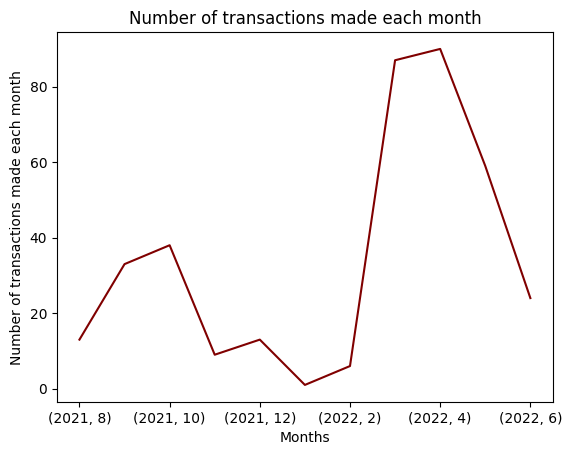

In [45]:
grouped_data.plot( kind = "line", color = "maroon")
plt.title("Number of transactions made each month")
plt.xlabel("Months")
plt.ylabel("Number of transactions made each month")
plt.xticks()
plt.show()

From the sorted list, it can be seen that April registered more transactions than any of the other months, followed by March and May. It is suprising that December did not come on top as one would expect that is when a lot of people spend their money.

2. How many transections were paid via M-Pesa send money?


In [46]:
# PULL THE DATA TO BE USED
# We want to count the number of transactions paid via MPESA Send Money

#APPROACH: Filter the transaction paid via MPESA as True

mpesa_transactions_df = money_df[money_df["IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY"] == True]

mpesa_transactions_df

,MERCHANT_CATEGORIZED_AT,MONTHS,MINUTES,HOURS,YEAR,MERCHANT_NAME,MERCHANT_CATEGORIZED_AS,PURCHASE_VALUE,PURCHASED_AT,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,USER_AGE,USER_GENDER,USER_HOUSEHOLD,USER_INCOME,USER_ID,Transaction_ID
5,2022-01-07 09:41:44.286084+00,1,41,9,2022,JOSEPH NTHENGE,Miscellaneous,14800,2022-01-08 12:56:00+00,True,27.0,Female,2,8000,ID_L8QMYB09,ID_0ntvo3wr
12,2022-06-01 10:23:56.42678+00,6,23,10,2022,ELIZABETH NYAMBURA,Groceries,300,2021-06-17 11:17:00+00,True,NaN,Female,1,85000,ID_1I8XYBWK,ID_1dzb2jew
13,2021-09-01 02:19:31.317098+00,9,19,2,2021,SAFARICOM POST,Data & WiFi,3000,2021-09-23 08:15:00+00,True,25.0,Female,4,90000,ID_U9WZMGJZ,ID_1ev8a8nu
15,2022-03-16 13:05:51.851102+00,3,5,13,2022,KPLC PREPAID,Bills & Fees,1000,2022-03-11 06:49:00+00,True,NaN,Male,1,200000,ID_5Y35KI6Q,ID_1kmitbhe
16,2022-04-12 15:59:14.139347+00,4,59,15,2022,TABITHA RAORE,Family & Friends,19000,2021-12-18 15:15:00+00,True,NaN,Male,5,252000,ID_3JA0MAFB,ID_1mzk2n06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,2022-03-16 13:08:19.703288+00,3,8,13,2022,CEDRIC OCHOLA,Family & Friends,250,2022-03-22 10:59:00+00,True,NaN,Male,5,150000,ID_O8P8YS18,ID_zcrvugl9
367,2022-03-16 13:05:51.851102+00,3,5,13,2022,NIMROD ZIRO,Family & Friends,2000,2021-12-27 20:14:00+00,True,NaN,Female,1,250000,ID_OZANC6XT,ID_zh4nw2s0
368,2021-08-06 11:28:03.723042+00,8,28,11,2021,ONESMUS GAKURU,Miscellaneous,500,2021-08-26 13:38:00+00,True,27.0,Female,2,8000,ID_L8QMYB09,ID_zr5x8yjs
369,2022-04-12 15:57:05.758311+00,4,57,15,2022,GLADWELL MBURU,Miscellaneous,400,2022-04-03 08:39:00+00,True,NaN,Male,5,750000,ID_D8FOVVBB,ID_zty81sq8


In [47]:
# Count the number of transactions

No_of_MPESA_Transactions = len(mpesa_transactions_df)

print(f"No of Mpesa Transactions = {No_of_MPESA_Transactions}")

No of Mpesa Transactions = 170


Monitoring the number of transactions processed through MPESA Sent Money helps evaluate the performance and reliability of the payment system, or monitoring user preference.

3 How many transections were paid via M-Pesa send money for each merchant?

In [48]:
mpesa_transactions_df = money_df[money_df["IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY"] == True]

mpesa_transactions_df

,MERCHANT_CATEGORIZED_AT,MONTHS,MINUTES,HOURS,YEAR,MERCHANT_NAME,MERCHANT_CATEGORIZED_AS,PURCHASE_VALUE,PURCHASED_AT,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,USER_AGE,USER_GENDER,USER_HOUSEHOLD,USER_INCOME,USER_ID,Transaction_ID
5,2022-01-07 09:41:44.286084+00,1,41,9,2022,JOSEPH NTHENGE,Miscellaneous,14800,2022-01-08 12:56:00+00,True,27.0,Female,2,8000,ID_L8QMYB09,ID_0ntvo3wr
12,2022-06-01 10:23:56.42678+00,6,23,10,2022,ELIZABETH NYAMBURA,Groceries,300,2021-06-17 11:17:00+00,True,NaN,Female,1,85000,ID_1I8XYBWK,ID_1dzb2jew
13,2021-09-01 02:19:31.317098+00,9,19,2,2021,SAFARICOM POST,Data & WiFi,3000,2021-09-23 08:15:00+00,True,25.0,Female,4,90000,ID_U9WZMGJZ,ID_1ev8a8nu
15,2022-03-16 13:05:51.851102+00,3,5,13,2022,KPLC PREPAID,Bills & Fees,1000,2022-03-11 06:49:00+00,True,NaN,Male,1,200000,ID_5Y35KI6Q,ID_1kmitbhe
16,2022-04-12 15:59:14.139347+00,4,59,15,2022,TABITHA RAORE,Family & Friends,19000,2021-12-18 15:15:00+00,True,NaN,Male,5,252000,ID_3JA0MAFB,ID_1mzk2n06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,2022-03-16 13:08:19.703288+00,3,8,13,2022,CEDRIC OCHOLA,Family & Friends,250,2022-03-22 10:59:00+00,True,NaN,Male,5,150000,ID_O8P8YS18,ID_zcrvugl9
367,2022-03-16 13:05:51.851102+00,3,5,13,2022,NIMROD ZIRO,Family & Friends,2000,2021-12-27 20:14:00+00,True,NaN,Female,1,250000,ID_OZANC6XT,ID_zh4nw2s0
368,2021-08-06 11:28:03.723042+00,8,28,11,2021,ONESMUS GAKURU,Miscellaneous,500,2021-08-26 13:38:00+00,True,27.0,Female,2,8000,ID_L8QMYB09,ID_zr5x8yjs
369,2022-04-12 15:57:05.758311+00,4,57,15,2022,GLADWELL MBURU,Miscellaneous,400,2022-04-03 08:39:00+00,True,NaN,Male,5,750000,ID_D8FOVVBB,ID_zty81sq8


In [49]:
# Count the number of transactions

No_of_MPESA_Transactions = len(mpesa_transactions_df)

print(f"No of Mpesa Transactions = {No_of_MPESA_Transactions}")

No of Mpesa Transactions = 170


In [50]:
merchant_name = money_df.loc[money_df["IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY"] == True] [["MERCHANT_NAME", "IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY"]]

mpesa_df = merchant_name.copy()

print(mpesa_df)

              MERCHANT_NAME  IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY
5            JOSEPH NTHENGE                                   True
12       ELIZABETH NYAMBURA                                   True
13           SAFARICOM POST                                   True
15             KPLC PREPAID                                   True
16            TABITHA RAORE                                   True
..                      ...                                    ...
365           CEDRIC OCHOLA                                   True
367             NIMROD ZIRO                                   True
368         ONESMUS  GAKURU                                   True
369          GLADWELL MBURU                                   True
371  EQUITY PAYBILL ACCOUNT                                   True

[170 rows x 2 columns]


In [51]:
counts = mpesa_df['IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY'].value_counts()
#print(counts)
mpesa_df

,MERCHANT_NAME,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY
5,JOSEPH NTHENGE,True
12,ELIZABETH NYAMBURA,True
13,SAFARICOM POST,True
15,KPLC PREPAID,True
16,TABITHA RAORE,True
...,...,...
365,CEDRIC OCHOLA,True
367,NIMROD ZIRO,True
368,ONESMUS GAKURU,True
369,GLADWELL MBURU,True


In [52]:
true_count = mpesa_df["IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY"].sum()
print("Count of True values: is ", true_count)

Count of True values: is  170


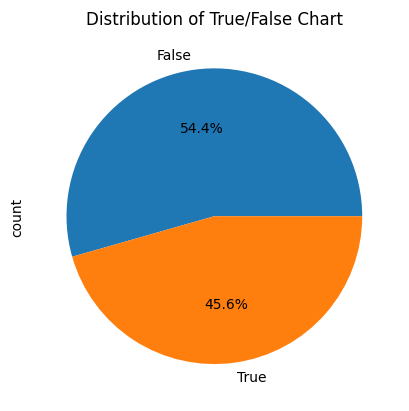

In [53]:
money_df['IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY'].value_counts().plot(kind='pie', autopct='%1.1f%%')

plt.title('Distribution of True/False Chart')

plt.show()

conclusion As we conclude from the given data, we discover that less people use MPESA to send money or purchase their needs.

4.People spend most of their income on which merchant category?

In [54]:
data1 = money_df.groupby('MERCHANT_CATEGORIZED_AS')["USER_INCOME"].count()
data1

MERCHANT_CATEGORIZED_AS
Bills & Fees        78
Data & WiFi         43
Education            2
Emergency fund      12
Family & Friends    41
Going out           41
Groceries           50
Health               6
Loan Repayment       5
Miscellaneous       43
Rent / Mortgage      2
Shopping            21
Transport & Fuel    29
Name: USER_INCOME, dtype: int64

Text(0, 0.5, 'INCOME')

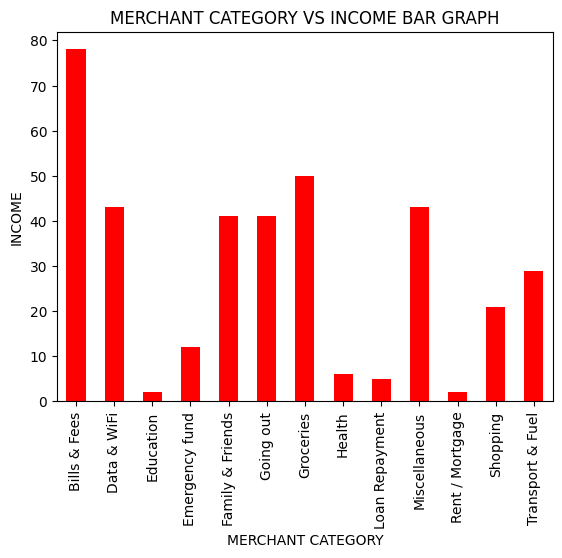

In [55]:
data1.plot(kind = "bar", color = "red")
plt.title("MERCHANT CATEGORY VS INCOME BAR GRAPH")
plt.xlabel("MERCHANT CATEGORY")
plt.ylabel("INCOME")

According to the above bar graph, we can conclude that people spend most of their income on Bills & Fees

5. Which merchant has the highest total purchase value?

In [56]:
#PULL THE DATA TO BE USED
## We need to check which merchant has the highest purchase value

#APPROACH: Use groupby() function to group MERCHANT_CATEGORIZED_AS by PURCHASE_VALUE
## Use sum to get the total value of transactions made my each merchant

grouped_df = money_df.groupby("MERCHANT_NAME")["PURCHASE_VALUE"].sum()

grouped_df


MERCHANT_NAME
AGGREY  MWANGALE                    1200
ALBERT  MBOGO                       2110
ALCHEMIIST - LEGEND BAR             2350
APS ABC PARKING                       50
ARNELLE OMONDI                       500
                                    ... 
WANZA SEKETA                          20
WINTA WOLDEGABRIEL +254795225400     300
ZILLIONS CREDIT LIMITED             5800
ZUKU  FOR                           6100
ZURI MEDICAL FUND  EVAN OMONDI      3000
Name: PURCHASE_VALUE, Length: 218, dtype: int64

In [57]:
grouped_df = pd.DataFrame(grouped_df)
grouped_df

,PURCHASE_VALUE
MERCHANT_NAME,
AGGREY MWANGALE,1200
ALBERT MBOGO,2110
ALCHEMIIST - LEGEND BAR,2350
APS ABC PARKING,50
ARNELLE OMONDI,500
...,...
WANZA SEKETA,20
WINTA WOLDEGABRIEL +254795225400,300
ZILLIONS CREDIT LIMITED,5800


In [58]:
#INDEX THE MAXIMUM VALUE

# Find the index of the maximum purchase value
max_merchant_name = grouped_df.idxmax()

print(f"Merchant with Maximum Value is: {max_merchant_name}")

Merchant with Maximum Value is: PURCHASE_VALUE    M-SHWARI ACCOUNT
dtype: object


In [59]:
# Find which MERCHANT has Highest Purchase Value

filtered_group_df = grouped_df[grouped_df["PURCHASE_VALUE"]  > 0.4 * grouped_df["PURCHASE_VALUE"].max()]
filtered_group_df

,PURCHASE_VALUE
MERCHANT_NAME,
AUDRINE MAKAKA,150000
CARREFOUR SRT,84009
EQUITY PAYBILL ACCOUNT,80000
IM BANK C2B,75800
JERUSA A OTIENO,115000
JIMMIE WAIRIMU,80000
LIBERTY LIFE,66204
LIPA KARO KCB ACCOUNT,71000
M-SHWARI ACCOUNT,164150


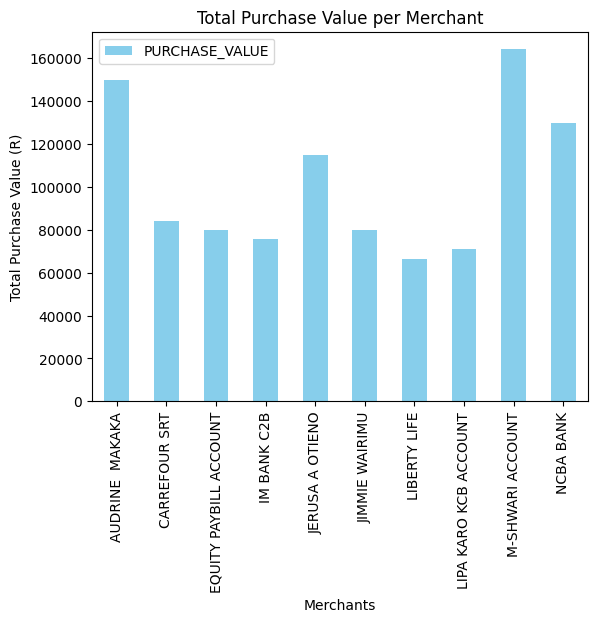

In [60]:
# Plot a Bar Graph

filtered_group_df.plot(kind = "bar", color = "skyblue")
plt.ylabel("Total Purchase Value (R)")
plt.xlabel("Merchants")
plt.title("Total Purchase Value per Merchant")
plt.show()

Knowing which merchant has the highest purchase value helps identify key clients or partners.

6.Which merchant registered/got  the most money through Mpesa?

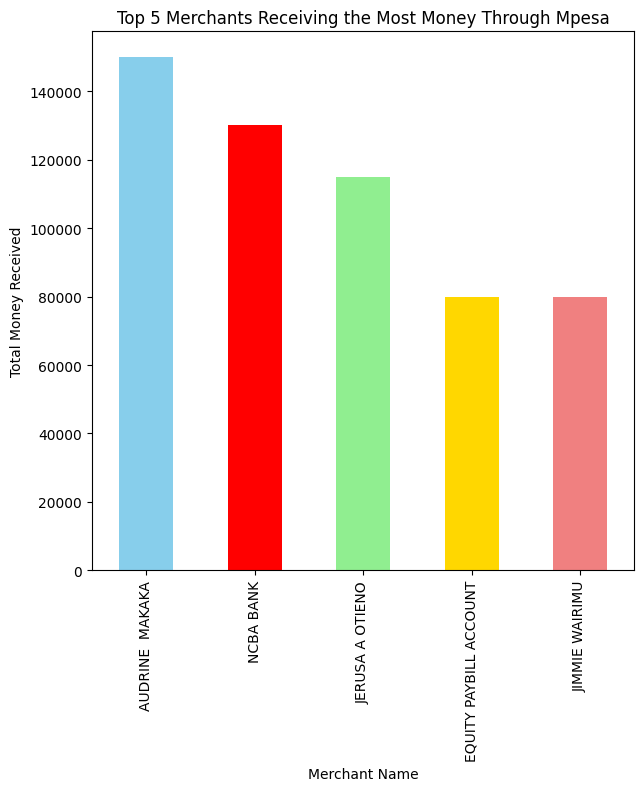

In [61]:
# Filter the data to include only transactions involving Mpesa
mpesa_transactions = money_df[money_df['IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY']]

# Group the filtered data by the "MERCHANT_NAME" column and calculate the total money received by each merchant
merchant_total_money = mpesa_transactions.groupby('MERCHANT_NAME')['PURCHASE_VALUE'].sum()

# Select the top 5 merchants that received the most money through Mpesa
top_5_merchants = merchant_total_money.nlargest(5)

# Define colors for each bar
colors = ['skyblue', 'red', 'lightgreen', 'gold', 'lightcoral']

# Plot the total money received by each merchant through Mpesa for the top 5 merchants with different colors
plt.figure(figsize=(7, 7))
top_5_merchants.sort_values(ascending=False).plot(kind='bar', color=colors)
plt.title('Top 5 Merchants Receiving the Most Money Through Mpesa')
plt.xlabel('Merchant Name')
plt.ylabel('Total Money Received')
plt.show()

Looking at the graph above, we obtained the best 5 of Merchants that received the most money through Mpesa, and out of this top 5 we can conclude that Audrine Makaka is the merchant that received most money through Mpesa compare to all the other 4 merchants that were top 5.

7. Which gender spends the  least on health?

In [62]:
gender_data = money_df[["USER_GENDER","MERCHANT_CATEGORIZED_AS"]]
gender_data

,USER_GENDER,MERCHANT_CATEGORIZED_AS
0,Male,Rent / Mortgage
1,Female,Transport & Fuel
2,Male,Data & WiFi
3,Male,Loan Repayment
4,Male,Bills & Fees
...,...,...
368,Female,Miscellaneous
369,Male,Miscellaneous
370,Male,Data & WiFi
371,Female,Bills & Fees


In [63]:
#Filter out only those that have used their account only for health

health_gender_data = gender_data[gender_data["MERCHANT_CATEGORIZED_AS"] == "Health"]
health_gender_data

,USER_GENDER,MERCHANT_CATEGORIZED_AS
89,Male,Health
105,Male,Health
160,Male,Health
178,Female,Health
240,Female,Health
300,Female,Health


In [64]:
health_gender_data.groupby(by = "USER_GENDER").count()

,MERCHANT_CATEGORIZED_AS
USER_GENDER,
Female,3
Male,3


From the results, only 6 people used their account for health purposes. On the 6 people, 50% of the people were male and 50% were female.

8. Who has the highest average income between the Males and Females?

In [65]:
users_income=money_df.groupby('USER_GENDER')['USER_INCOME'].mean()
users_income

USER_GENDER
Female     96282.352941
Male      193492.385787
Name: USER_INCOME, dtype: float64

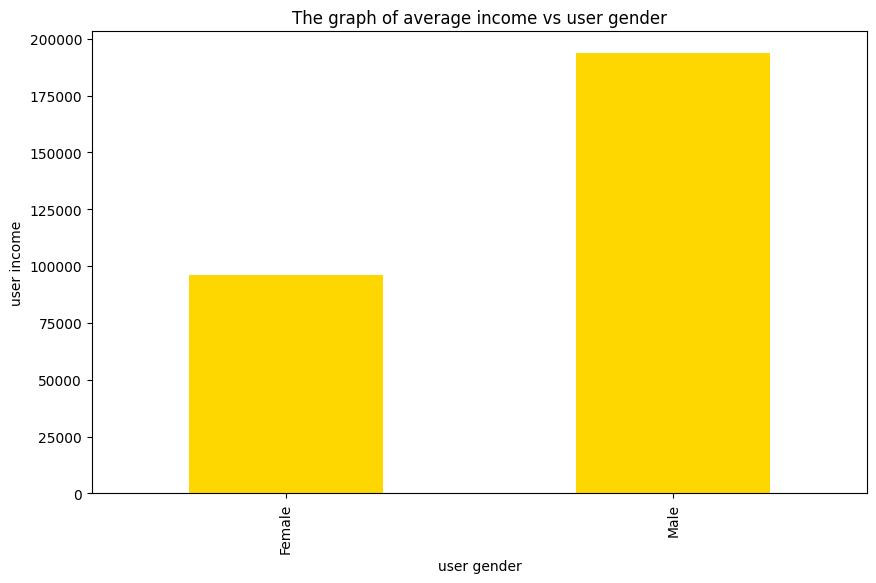

In [66]:
plt.figure(figsize=(10,6))
users_income.plot(kind='bar',color='gold')

plt.title('The graph of average income vs user gender')
plt.xlabel('user gender')
plt.ylabel('user income')

plt.show()



```
The average income of men is higher than that of women.
```



9.Which gender, Male or Female, spends the most on shopping?

In [67]:
shopping_df = money_df[money_df["MERCHANT_CATEGORIZED_AS"] == "Shopping"]
shopping_df [["MERCHANT_CATEGORIZED_AS","USER_GENDER", "PURCHASE_VALUE"]]

,MERCHANT_CATEGORIZED_AS,USER_GENDER,PURCHASE_VALUE
8,Shopping,Male,1600
44,Shopping,Male,1800
55,Shopping,Male,2700
80,Shopping,Male,36990
84,Shopping,Female,1200
90,Shopping,Male,175
107,Shopping,Male,2700
122,Shopping,Female,11400
123,Shopping,Male,250
137,Shopping,NaN,3298


In [68]:
groupgender = shopping_df.groupby("USER_GENDER")["PURCHASE_VALUE"].sum()
groupgender

USER_GENDER
Female    14310
Male      56938
Name: PURCHASE_VALUE, dtype: int64

Text(0, 0.5, 'PURCHASE VALUE')

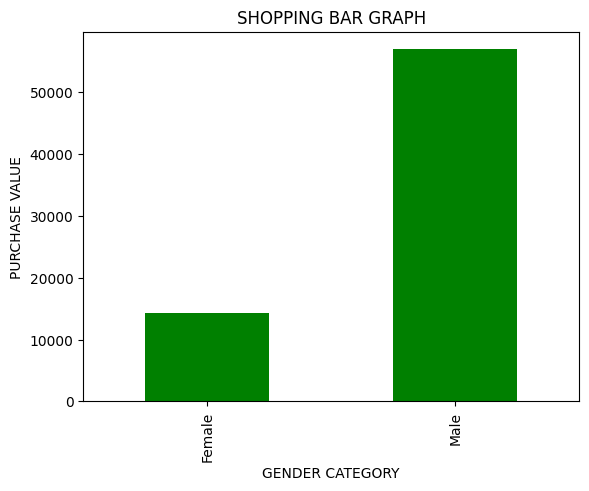

In [69]:
groupgender.plot(kind = "bar", color = "green")
plt.title("SHOPPING BAR GRAPH")
plt.xlabel("GENDER CATEGORY")
plt.ylabel("PURCHASE VALUE")

From the above graph, we can conclude that males spend more money on shopping than females.

10.Which year did people spend the most on transportation and fuel?

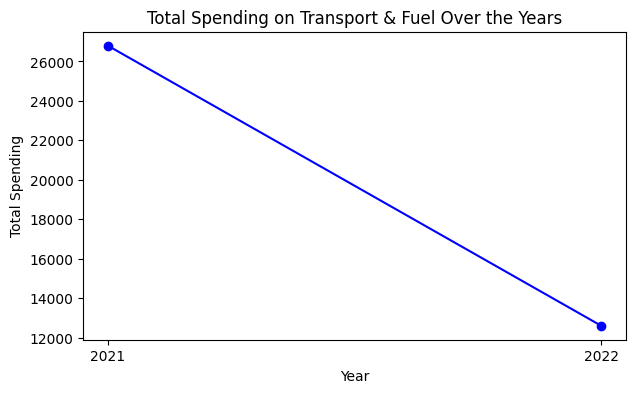

In [70]:
# Filter the data to include only transactions related to "Transport & Fuel"
transport_fuel_data = money_df[money_df['MERCHANT_CATEGORIZED_AS'] == 'Transport & Fuel']

# Group the filtered data by year and calculate the total spending for each year
yearly_spending = transport_fuel_data.groupby('YEAR')['PURCHASE_VALUE'].sum()

# Plot the total spending over the years using a line graph
plt.figure(figsize=(7, 4))
plt.plot(yearly_spending.index, yearly_spending.values, marker='o', color='blue', linestyle='-')
plt.title('Total Spending on Transport & Fuel Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Spending')
plt.xticks(yearly_spending.index)
plt.show()

Looking at the graph above, we can conclude that the total spending for transport and fuel was higher on 2021 compare to 2022, i.e it declined on 2022.